## 0) Preliminaries

In [1]:
library(ape)
library(ggtree)
library(phangorn)
library(Quartet)
library(adephylo)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate


Loading requir

## 1) Reading trees

In [43]:
rank_tree <- read.tree("results/rank_tree.nwk")
rankindl_tree <- read.tree("results/rankindl_tree.nwk")
dcj_tree <- read.tree("results/dcj_tree_5000.nwk")
ref_tree <- read.tree("dummy_tree.nwk")

## 2) Topological comparison of trees

In [17]:
display_metrics <- function(tree, ref_tree) {
    splitStatuses <- SplitStatus(tree, ref_tree)
    quartetStatuses <- QuartetStatus(tree, ref_tree)
    print(paste("Robinson-Foulds: ", RawSymmetricDifference(splitStatuses)))
    print(paste("Robinson-Foulds (normlized)", RawSymmetricDifference(splitStatuses) / splitStatuses[, 'N']))
    print(paste("Similarity by Quartets: ", SymmetricDifference(quartetStatuses)))
}

### 2.1) Rank vs. Reference

In [44]:
display_metrics(rank_tree, ref_tree)

[1] "Robinson-Foulds:  18"
[1] "Robinson-Foulds (normlized) 0.529411764705882"
[1] "Similarity by Quartets:  0.663983488132095"


### 2.2) Rank-Indel vs. Reference

In [32]:
display_metrics(rankindl_tree, ref_tree)

[1] "Robinson-Foulds:  18"
[1] "Robinson-Foulds (normlized) 0.529411764705882"
[1] "Similarity by Quartets:  0.67781217750258"


### 2.3) DCJ vs. Reference

In [12]:
display_metrics(dcj_tree, ref_tree)

[1] "Robinson-Foulds:  14"
[1] "Similarity by Quartets:  0.67843137254902"


## 3) Face to face plots

In [12]:
plot_cophylo <- function(tree1, tree2) {
    cophyloplot(ladderize(tree1), ladderize(tree2),
                assoc = matrix(rep(tree2$tip.label, 2), ncol = 2),
                length.line = 4, space = 28, gap = 3);
}

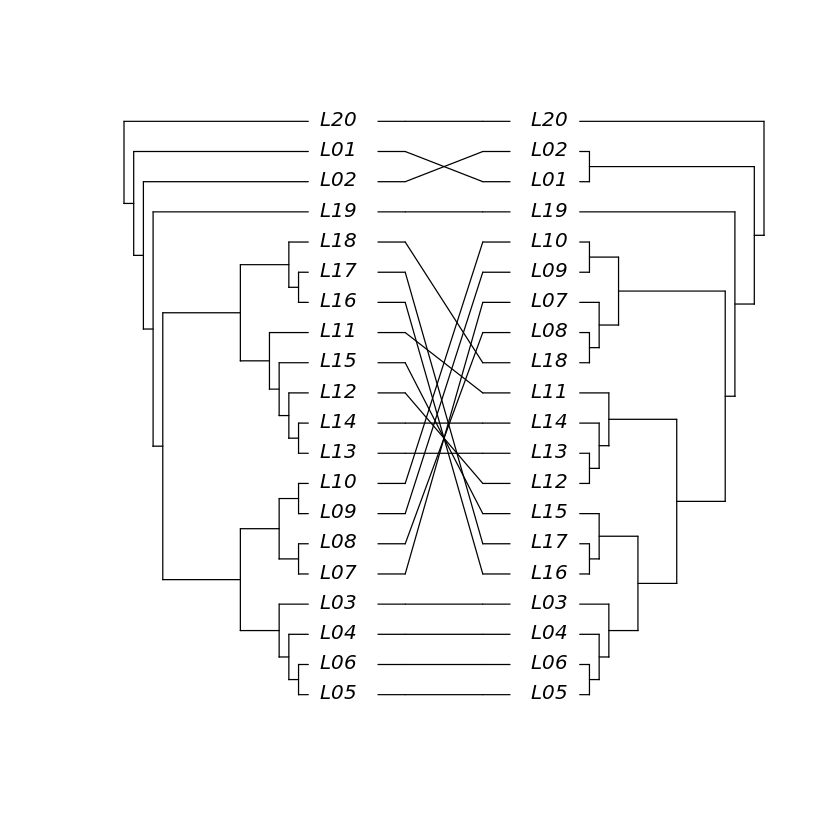

In [45]:
png("ref_vs_rank.png")
plot_cophylo(ref_tree, rank_tree)
dev.off()

In [37]:
png("ref_vs_rankindl.png")
plot_cophylo(ref_tree, rankindl_tree)
dev.off()

png 
  2

In [29]:
png("ref_vs_dcj.png")
plot_cophylo(ref_tree, dcj_tree)
dev.off()

png 
  2